In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

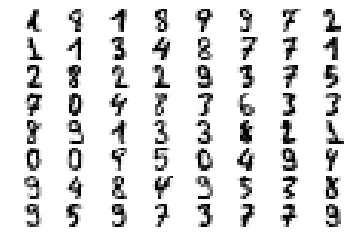

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 6)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T.tolist() 

In [7]:
classes = []
for i in range(2**(10-1) - 1):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/511".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/511
number of class1:162
number of class2:1455

 ****** Running generation 0 ****** 

Population's average fitness: 0.62481 stdev: 0.25407
Best fitness: 0.94991 - size: (2, 13) - species 4 - id 178
Average adjusted fitness: 0.563
Mean genetic distance 2.911, standard deviation 0.478
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 7.941 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.71447 stdev: 0.23605
Best fitness: 0.95300 - size: (3, 14) - species 26 - id 376
Average adjusted fitness: 0.619
Mean genetic distance 2.999, standard deviation 0.486
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 7.154 sec (7.548 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.78408 stdev: 0.19907
Best fitness: 0.95300 - size: (3, 14) - species 4 - id 376
Average adjusted fitness: 0.655
Mean genetic distance 3.002, standard deviation 0.481
Population of 197 members in 33 species

Mean genetic distance 3.113, standard deviation 0.473
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 17.733 sec (16.709 average)
running:4/511
number of class1:322
number of class2:1295

 ****** Running generation 0 ****** 

Population's average fitness: 0.56175 stdev: 0.21526
Best fitness: 0.84910 - size: (2, 13) - species 1 - id 142
Average adjusted fitness: 0.417
Mean genetic distance 2.897, standard deviation 0.489
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 14.436 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.69458 stdev: 0.17136
Best fitness: 0.86704 - size: (3, 15) - species 1 - id 349
Average adjusted fitness: 0.536
Mean genetic distance 3.042, standard deviation 0.494
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 15.158 sec (14.797 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.70511 stdev: 0.16550
Best fitness: 0.88250 

Population's average fitness: 0.61533 stdev: 0.08942
Best fitness: 0.78541 - size: (3, 12) - species 27 - id 948
Average adjusted fitness: 0.250
Mean genetic distance 3.061, standard deviation 0.481
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 16.819 sec (15.923 average)
running:8/511
number of class1:325
number of class2:1292

 ****** Running generation 0 ****** 

Population's average fitness: 0.58076 stdev: 0.21152
Best fitness: 0.85096 - size: (2, 13) - species 3 - id 29
Average adjusted fitness: 0.457
Mean genetic distance 2.969, standard deviation 0.491
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 14.266 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.69762 stdev: 0.17354
Best fitness: 0.86889 - size: (3, 14) - species 13 - id 236
Average adjusted fitness: 0.480
Mean genetic distance 3.062, standard deviation 0.497
Population of 203 members in 31 species
Total extinctions: 0
Generation tim

Mean genetic distance 3.029, standard deviation 0.485
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 16.006 sec (14.907 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60637 stdev: 0.09065
Best fitness: 0.76747 - size: (4, 17) - species 22 - id 480
Average adjusted fitness: 0.201
Mean genetic distance 3.056, standard deviation 0.476
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 16.430 sec (15.161 average)
running:12/511
number of class1:485
number of class2:1132

 ****** Running generation 0 ****** 

Population's average fitness: 0.56025 stdev: 0.15686
Best fitness: 0.83426 - size: (2, 13) - species 1 - id 139
Average adjusted fitness: 0.314
Mean genetic distance 2.828, standard deviation 0.454
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 13.564 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61731 stdev: 0.14257
Best fitness: 0.8342

Population's average fitness: 0.56611 stdev: 0.06789
Best fitness: 0.72542 - size: (3, 15) - species 4 - id 491
Average adjusted fitness: 0.255
Mean genetic distance 3.082, standard deviation 0.520
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 15.357 sec (14.901 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56359 stdev: 0.06895
Best fitness: 0.72542 - size: (3, 15) - species 4 - id 491
Average adjusted fitness: 0.250
Mean genetic distance 3.097, standard deviation 0.520
Population of 208 members in 34 species
Total extinctions: 0
Generation time: 15.766 sec (15.045 average)
running:16/511
number of class1:326
number of class2:1291

 ****** Running generation 0 ****** 

Population's average fitness: 0.55353 stdev: 0.21451
Best fitness: 0.87260 - size: (2, 13) - species 3 - id 150
Average adjusted fitness: 0.462
Mean genetic distance 2.934, standard deviation 0.510
Population of 201 members in 23 species
Total extinctions:

Mean genetic distance 3.030, standard deviation 0.456
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 16.707 sec (15.006 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60393 stdev: 0.10389
Best fitness: 0.77798 - size: (5, 20) - species 35 - id 819
Average adjusted fitness: 0.321
Mean genetic distance 3.073, standard deviation 0.452
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 16.050 sec (15.215 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61862 stdev: 0.10029
Best fitness: 0.77860 - size: (6, 19) - species 14 - id 910
Average adjusted fitness: 0.220
Mean genetic distance 3.081, standard deviation 0.458
Population of 198 members in 44 species
Total extinctions: 0
Generation time: 16.424 sec (15.416 average)
running:20/511
number of class1:486
number of class2:1131

 ****** Running generation 0 ****** 

Population's average fitness: 0.54503 stdev: 0.15145
Be

Population's average fitness: 0.57825 stdev: 0.07705
Best fitness: 0.74521 - size: (3, 15) - species 4 - id 613
Average adjusted fitness: 0.176
Mean genetic distance 3.113, standard deviation 0.516
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 15.651 sec (14.844 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58364 stdev: 0.07487
Best fitness: 0.74521 - size: (3, 15) - species 4 - id 613
Average adjusted fitness: 0.142
Mean genetic distance 3.164, standard deviation 0.515
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 15.912 sec (15.058 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58064 stdev: 0.08335
Best fitness: 0.74521 - size: (3, 15) - species 4 - id 613
Average adjusted fitness: 0.266
Mean genetic distance 3.155, standard deviation 0.504
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 16.804 sec (15.349 average)
running:24

Mean genetic distance 2.951, standard deviation 0.479
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 15.337 sec (14.572 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58125 stdev: 0.08593
Best fitness: 0.78108 - size: (4, 15) - species 32 - id 658
Average adjusted fitness: 0.211
Mean genetic distance 2.988, standard deviation 0.488
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 15.838 sec (14.888 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58426 stdev: 0.08455
Best fitness: 0.78108 - size: (4, 15) - species 32 - id 658
Average adjusted fitness: 0.150
Mean genetic distance 3.052, standard deviation 0.482
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 16.519 sec (15.215 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58957 stdev: 0.08932
Best fitness: 0.78108 - size: (4, 15) - species 32 - id 658


Population's average fitness: 0.55506 stdev: 0.09109
Best fitness: 0.75634 - size: (4, 16) - species 7 - id 545
Average adjusted fitness: 0.269
Mean genetic distance 3.077, standard deviation 0.517
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 18.769 sec (19.395 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57544 stdev: 0.08410
Best fitness: 0.75634 - size: (4, 16) - species 7 - id 545
Average adjusted fitness: 0.251
Mean genetic distance 3.123, standard deviation 0.517
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 17.245 sec (18.857 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57978 stdev: 0.08639
Best fitness: 0.75634 - size: (4, 16) - species 7 - id 545
Average adjusted fitness: 0.231
Mean genetic distance 3.102, standard deviation 0.527
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 17.876 sec (18.661 average)

 ****** R

Mean genetic distance 2.809, standard deviation 0.446
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 16.721 sec (17.264 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58518 stdev: 0.08028
Best fitness: 0.73964 - size: (2, 13) - species 1 - id 37
Average adjusted fitness: 0.212
Mean genetic distance 2.894, standard deviation 0.501
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 19.757 sec (18.095 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58611 stdev: 0.08477
Best fitness: 0.73964 - size: (2, 13) - species 1 - id 37
Average adjusted fitness: 0.288
Mean genetic distance 2.958, standard deviation 0.488
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 19.743 sec (18.507 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58696 stdev: 0.08804
Best fitness: 0.74830 - size: (6, 22) - species 8 - id 822
Avera

Population's average fitness: 0.54296 stdev: 0.07329
Best fitness: 0.76994 - size: (2, 14) - species 14 - id 357
Average adjusted fitness: 0.205
Mean genetic distance 3.014, standard deviation 0.504
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 17.911 sec (16.912 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55418 stdev: 0.08158
Best fitness: 0.79777 - size: (2, 15) - species 19 - id 473
Average adjusted fitness: 0.270
Mean genetic distance 3.000, standard deviation 0.496
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 18.986 sec (17.604 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56162 stdev: 0.08624
Best fitness: 0.80396 - size: (2, 14) - species 10 - id 680
Average adjusted fitness: 0.221
Mean genetic distance 3.027, standard deviation 0.492
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 18.617 sec (17.857 average)

 *****

Mean genetic distance 2.983, standard deviation 0.481
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 16.745 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53047 stdev: 0.07889
Best fitness: 0.75943 - size: (3, 15) - species 2 - id 245
Average adjusted fitness: 0.257
Mean genetic distance 2.994, standard deviation 0.474
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 17.858 sec (17.302 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56264 stdev: 0.07661
Best fitness: 0.75943 - size: (3, 15) - species 2 - id 245
Average adjusted fitness: 0.231
Mean genetic distance 2.943, standard deviation 0.490
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 19.323 sec (17.976 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57304 stdev: 0.07891
Best fitness: 0.75943 - size: (3, 15) - species 2 - id 245
Average adjusted fit

Population's average fitness: 0.47952 stdev: 0.09450
Best fitness: 0.72913 - size: (2, 13) - species 1 - id 79
Average adjusted fitness: 0.260
Mean genetic distance 2.860, standard deviation 0.455
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 14.396 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53962 stdev: 0.10488
Best fitness: 0.76562 - size: (3, 15) - species 12 - id 273
Average adjusted fitness: 0.332
Mean genetic distance 2.960, standard deviation 0.499
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 15.211 sec (14.803 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57204 stdev: 0.10682
Best fitness: 0.76562 - size: (3, 15) - species 12 - id 273
Average adjusted fitness: 0.262
Mean genetic distance 2.981, standard deviation 0.521
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 16.212 sec (15.273 average)

 ****** Running generatio

Population's average fitness: 0.49950 stdev: 0.06118
Best fitness: 0.66914 - size: (2, 13) - species 1 - id 126
Average adjusted fitness: 0.190
Mean genetic distance 2.851, standard deviation 0.480
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 14.247 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53036 stdev: 0.06930
Best fitness: 0.67471 - size: (3, 14) - species 6 - id 231
Average adjusted fitness: 0.257
Mean genetic distance 3.015, standard deviation 0.495
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 15.335 sec (14.791 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55960 stdev: 0.07154
Best fitness: 0.72171 - size: (3, 15) - species 28 - id 548
Average adjusted fitness: 0.296
Mean genetic distance 3.014, standard deviation 0.506
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 16.306 sec (15.296 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.48933 stdev: 0.09781
Best fitness: 0.75510 - size: (2, 13) - species 2 - id 158
Average adjusted fitness: 0.319
Mean genetic distance 2.953, standard deviation 0.523
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 17.050 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54744 stdev: 0.10169
Best fitness: 0.75510 - size: (2, 13) - species 4 - id 158
Average adjusted fitness: 0.258
Mean genetic distance 3.025, standard deviation 0.519
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 18.978 sec (18.014 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56883 stdev: 0.10497
Best fitness: 0.76809 - size: (3, 15) - species 4 - id 538
Average adjusted fitness: 0.240
Mean genetic distance 3.050, standard deviation 0.474
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 19.333 sec (18.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.47833 stdev: 0.10006
Best fitness: 0.70872 - size: (2, 13) - species 2 - id 194
Average adjusted fitness: 0.253
Mean genetic distance 2.847, standard deviation 0.432
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 15.701 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54669 stdev: 0.10072
Best fitness: 0.77675 - size: (3, 15) - species 3 - id 354
Average adjusted fitness: 0.245
Mean genetic distance 2.943, standard deviation 0.443
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 15.805 sec (15.753 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55928 stdev: 0.11253
Best fitness: 0.79097 - size: (3, 15) - species 22 - id 531
Average adjusted fitness: 0.312
Mean genetic distance 3.003, standard deviation 0.464
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 17.705 sec (16.


 ****** Running generation 0 ****** 

Population's average fitness: 0.45837 stdev: 0.14870
Best fitness: 0.74830 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.204
Mean genetic distance 2.869, standard deviation 0.487
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 15.811 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54690 stdev: 0.14950
Best fitness: 0.76438 - size: (3, 15) - species 6 - id 234
Average adjusted fitness: 0.333
Mean genetic distance 2.955, standard deviation 0.511
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 17.183 sec (16.497 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59921 stdev: 0.13482
Best fitness: 0.77613 - size: (2, 13) - species 12 - id 449
Average adjusted fitness: 0.353
Mean genetic distance 3.001, standard deviation 0.493
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 17.129 sec (16.70


 ****** Running generation 0 ****** 

Population's average fitness: 0.51731 stdev: 0.09325
Best fitness: 0.76129 - size: (2, 13) - species 3 - id 87
Average adjusted fitness: 0.263
Mean genetic distance 2.938, standard deviation 0.480
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 14.874 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56584 stdev: 0.08985
Best fitness: 0.76129 - size: (2, 13) - species 3 - id 87
Average adjusted fitness: 0.231
Mean genetic distance 2.992, standard deviation 0.485
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 15.500 sec (15.187 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58412 stdev: 0.09484
Best fitness: 0.78293 - size: (4, 16) - species 1 - id 532
Average adjusted fitness: 0.197
Mean genetic distance 3.010, standard deviation 0.474
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 16.436 sec (15.603


 ****** Running generation 0 ****** 

Population's average fitness: 0.50011 stdev: 0.06277
Best fitness: 0.70130 - size: (2, 13) - species 2 - id 97
Average adjusted fitness: 0.209
Mean genetic distance 2.911, standard deviation 0.458
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 17.026 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54007 stdev: 0.07433
Best fitness: 0.75015 - size: (3, 14) - species 23 - id 369
Average adjusted fitness: 0.191
Mean genetic distance 2.966, standard deviation 0.486
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 16.846 sec (16.936 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56416 stdev: 0.07415
Best fitness: 0.76871 - size: (4, 17) - species 23 - id 538
Average adjusted fitness: 0.163
Mean genetic distance 2.990, standard deviation 0.482
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 18.005 sec (17.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49511 stdev: 0.06202
Best fitness: 0.69326 - size: (2, 13) - species 2 - id 180
Average adjusted fitness: 0.235
Mean genetic distance 2.897, standard deviation 0.460
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 15.540 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52943 stdev: 0.06890
Best fitness: 0.69759 - size: (3, 14) - species 23 - id 333
Average adjusted fitness: 0.208
Mean genetic distance 2.956, standard deviation 0.470
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 16.817 sec (16.178 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54700 stdev: 0.07392
Best fitness: 0.75077 - size: (3, 15) - species 22 - id 399
Average adjusted fitness: 0.250
Mean genetic distance 3.017, standard deviation 0.466
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 19.576 sec (17


 ****** Running generation 0 ****** 

Population's average fitness: 0.48229 stdev: 0.09466
Best fitness: 0.68893 - size: (2, 13) - species 1 - id 170
Average adjusted fitness: 0.181
Mean genetic distance 2.807, standard deviation 0.464
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 22.182 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53061 stdev: 0.09248
Best fitness: 0.68893 - size: (2, 13) - species 7 - id 170
Average adjusted fitness: 0.250
Mean genetic distance 2.940, standard deviation 0.507
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 22.433 sec (22.307 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55900 stdev: 0.09169
Best fitness: 0.70501 - size: (2, 14) - species 12 - id 462
Average adjusted fitness: 0.238
Mean genetic distance 3.038, standard deviation 0.490
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 21.707 sec (22.


 ****** Running generation 0 ****** 

Population's average fitness: 0.50148 stdev: 0.08009
Best fitness: 0.69635 - size: (2, 13) - species 1 - id 52
Average adjusted fitness: 0.226
Mean genetic distance 2.964, standard deviation 0.528
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 18.538 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54541 stdev: 0.07662
Best fitness: 0.75758 - size: (2, 14) - species 2 - id 292
Average adjusted fitness: 0.233
Mean genetic distance 3.020, standard deviation 0.533
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 19.430 sec (18.984 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55550 stdev: 0.08783
Best fitness: 0.80396 - size: (4, 17) - species 4 - id 524
Average adjusted fitness: 0.239
Mean genetic distance 3.100, standard deviation 0.504
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 19.725 sec (19.23


 ****** Running generation 0 ****** 

Population's average fitness: 0.48280 stdev: 0.10492
Best fitness: 0.77984 - size: (2, 13) - species 3 - id 70
Average adjusted fitness: 0.215
Mean genetic distance 2.891, standard deviation 0.529
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 20.709 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52876 stdev: 0.10243
Best fitness: 0.77984 - size: (2, 13) - species 4 - id 70
Average adjusted fitness: 0.205
Mean genetic distance 3.008, standard deviation 0.510
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 21.324 sec (21.017 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56082 stdev: 0.10792
Best fitness: 0.77984 - size: (2, 13) - species 21 - id 70
Average adjusted fitness: 0.244
Mean genetic distance 3.070, standard deviation 0.506
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 21.830 sec (21.288


 ****** Running generation 0 ****** 

Population's average fitness: 0.46604 stdev: 0.10627
Best fitness: 0.79344 - size: (2, 13) - species 5 - id 111
Average adjusted fitness: 0.265
Mean genetic distance 2.911, standard deviation 0.483
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 21.878 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53030 stdev: 0.11486
Best fitness: 0.79344 - size: (2, 13) - species 5 - id 111
Average adjusted fitness: 0.252
Mean genetic distance 2.984, standard deviation 0.484
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 24.354 sec (23.116 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58519 stdev: 0.10048
Best fitness: 0.79344 - size: (2, 13) - species 23 - id 111
Average adjusted fitness: 0.233
Mean genetic distance 3.006, standard deviation 0.494
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 27.846 sec (24.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47074 stdev: 0.15529
Best fitness: 0.78602 - size: (2, 13) - species 7 - id 47
Average adjusted fitness: 0.269
Mean genetic distance 2.943, standard deviation 0.478
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 20.092 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57576 stdev: 0.14482
Best fitness: 0.82189 - size: (3, 15) - species 5 - id 347
Average adjusted fitness: 0.302
Mean genetic distance 2.961, standard deviation 0.494
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 20.940 sec (20.516 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60310 stdev: 0.14664
Best fitness: 0.82189 - size: (3, 15) - species 20 - id 347
Average adjusted fitness: 0.342
Mean genetic distance 2.960, standard deviation 0.506
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 27.477 sec (22.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.50078 stdev: 0.06283
Best fitness: 0.69821 - size: (2, 13) - species 3 - id 128
Average adjusted fitness: 0.186
Mean genetic distance 2.906, standard deviation 0.465
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 18.216 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53036 stdev: 0.06506
Best fitness: 0.69821 - size: (2, 13) - species 3 - id 128
Average adjusted fitness: 0.172
Mean genetic distance 3.013, standard deviation 0.471
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 22.741 sec (20.479 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54708 stdev: 0.06608
Best fitness: 0.69821 - size: (2, 13) - species 3 - id 128
Average adjusted fitness: 0.191
Mean genetic distance 3.000, standard deviation 0.474
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 25.097 sec (22.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.47481 stdev: 0.09451
Best fitness: 0.71119 - size: (2, 13) - species 1 - id 122
Average adjusted fitness: 0.291
Mean genetic distance 2.882, standard deviation 0.485
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 18.974 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54192 stdev: 0.09991
Best fitness: 0.76994 - size: (3, 14) - species 3 - id 296
Average adjusted fitness: 0.305
Mean genetic distance 3.031, standard deviation 0.480
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 20.674 sec (19.824 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57352 stdev: 0.09679
Best fitness: 0.77242 - size: (4, 17) - species 19 - id 531
Average adjusted fitness: 0.235
Mean genetic distance 3.055, standard deviation 0.476
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 21.627 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47238 stdev: 0.09595
Best fitness: 0.73408 - size: (2, 13) - species 4 - id 93
Average adjusted fitness: 0.161
Mean genetic distance 2.875, standard deviation 0.487
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 21.662 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52976 stdev: 0.09808
Best fitness: 0.73408 - size: (2, 13) - species 4 - id 93
Average adjusted fitness: 0.216
Mean genetic distance 2.985, standard deviation 0.501
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 20.376 sec (21.019 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53989 stdev: 0.10127
Best fitness: 0.73408 - size: (2, 13) - species 4 - id 93
Average adjusted fitness: 0.214
Mean genetic distance 3.065, standard deviation 0.476
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 21.919 sec (21.319 


 ****** Running generation 0 ****** 

Population's average fitness: 0.47652 stdev: 0.14867
Best fitness: 0.74830 - size: (2, 13) - species 1 - id 186
Average adjusted fitness: 0.214
Mean genetic distance 2.974, standard deviation 0.496
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 19.226 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57289 stdev: 0.14175
Best fitness: 0.77737 - size: (2, 13) - species 5 - id 319
Average adjusted fitness: 0.305
Mean genetic distance 3.034, standard deviation 0.491
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 20.275 sec (19.751 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60286 stdev: 0.13781
Best fitness: 0.77737 - size: (2, 13) - species 5 - id 319
Average adjusted fitness: 0.324
Mean genetic distance 3.015, standard deviation 0.504
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 20.949 sec (20.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.47539 stdev: 0.09461
Best fitness: 0.76562 - size: (2, 13) - species 1 - id 34
Average adjusted fitness: 0.199
Mean genetic distance 2.885, standard deviation 0.492
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 24.247 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54459 stdev: 0.09810
Best fitness: 0.76562 - size: (2, 13) - species 1 - id 34
Average adjusted fitness: 0.212
Mean genetic distance 2.987, standard deviation 0.478
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 24.601 sec (24.424 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55890 stdev: 0.10072
Best fitness: 0.76562 - size: (2, 13) - species 1 - id 34
Average adjusted fitness: 0.247
Mean genetic distance 3.014, standard deviation 0.497
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 20.992 sec (23.280 


 ****** Running generation 0 ****** 

Population's average fitness: 0.46371 stdev: 0.16101
Best fitness: 0.82066 - size: (2, 13) - species 2 - id 3
Average adjusted fitness: 0.270
Mean genetic distance 2.924, standard deviation 0.469
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 21.220 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55412 stdev: 0.15313
Best fitness: 0.82066 - size: (2, 13) - species 2 - id 3
Average adjusted fitness: 0.364
Mean genetic distance 2.973, standard deviation 0.457
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 22.951 sec (22.085 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59236 stdev: 0.14277
Best fitness: 0.82066 - size: (2, 13) - species 21 - id 3
Average adjusted fitness: 0.364
Mean genetic distance 2.961, standard deviation 0.466
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 23.982 sec (22.718 av


 ****** Running generation 0 ****** 

Population's average fitness: 0.45690 stdev: 0.15751
Best fitness: 0.74335 - size: (2, 13) - species 3 - id 48
Average adjusted fitness: 0.197
Mean genetic distance 2.938, standard deviation 0.429
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 21.766 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57709 stdev: 0.14908
Best fitness: 0.76067 - size: (3, 15) - species 11 - id 251
Average adjusted fitness: 0.332
Mean genetic distance 2.991, standard deviation 0.441
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 22.562 sec (22.164 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60194 stdev: 0.14879
Best fitness: 0.80519 - size: (3, 15) - species 38 - id 519
Average adjusted fitness: 0.352
Mean genetic distance 3.078, standard deviation 0.446
Population of 209 members in 48 species
Total extinctions: 0
Generation time: 24.281 sec (22.


 ****** Running generation 0 ****** 

Population's average fitness: 0.46030 stdev: 0.21916
Best fitness: 0.81756 - size: (2, 13) - species 1 - id 112
Average adjusted fitness: 0.255
Mean genetic distance 2.850, standard deviation 0.447
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 22.985 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60653 stdev: 0.20219
Best fitness: 0.83055 - size: (2, 13) - species 13 - id 291
Average adjusted fitness: 0.444
Mean genetic distance 2.991, standard deviation 0.481
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 24.365 sec (23.675 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65502 stdev: 0.18529
Best fitness: 0.84416 - size: (3, 13) - species 29 - id 553
Average adjusted fitness: 0.456
Mean genetic distance 3.090, standard deviation 0.470
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 25.253 sec (24


 ****** Running generation 0 ****** 

Population's average fitness: 0.52869 stdev: 0.08086
Best fitness: 0.69079 - size: (2, 13) - species 1 - id 51
Average adjusted fitness: 0.199
Mean genetic distance 2.914, standard deviation 0.476
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 26.879 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55576 stdev: 0.08253
Best fitness: 0.71058 - size: (3, 15) - species 18 - id 326
Average adjusted fitness: 0.210
Mean genetic distance 3.005, standard deviation 0.516
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 27.215 sec (27.047 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56216 stdev: 0.08389
Best fitness: 0.71985 - size: (4, 15) - species 3 - id 480
Average adjusted fitness: 0.265
Mean genetic distance 3.074, standard deviation 0.517
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 28.925 sec (27.6


 ****** Running generation 0 ****** 

Population's average fitness: 0.50770 stdev: 0.05791
Best fitness: 0.73346 - size: (2, 13) - species 8 - id 164
Average adjusted fitness: 0.191
Mean genetic distance 2.939, standard deviation 0.495
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 23.712 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53541 stdev: 0.06977
Best fitness: 0.73346 - size: (2, 13) - species 8 - id 164
Average adjusted fitness: 0.206
Mean genetic distance 2.921, standard deviation 0.490
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 28.774 sec (26.243 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55277 stdev: 0.06808
Best fitness: 0.76376 - size: (4, 15) - species 8 - id 542
Average adjusted fitness: 0.141
Mean genetic distance 2.938, standard deviation 0.470
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 25.373 sec (25.9


 ****** Running generation 0 ****** 

Population's average fitness: 0.49673 stdev: 0.07089
Best fitness: 0.73593 - size: (2, 13) - species 4 - id 75
Average adjusted fitness: 0.207
Mean genetic distance 2.848, standard deviation 0.469
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 20.328 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53487 stdev: 0.07902
Best fitness: 0.73593 - size: (2, 13) - species 4 - id 75
Average adjusted fitness: 0.232
Mean genetic distance 2.941, standard deviation 0.477
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 21.028 sec (20.678 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55436 stdev: 0.07525
Best fitness: 0.73902 - size: (4, 17) - species 1 - id 502
Average adjusted fitness: 0.199
Mean genetic distance 2.965, standard deviation 0.468
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 21.882 sec (21.080


 ****** Running generation 0 ****** 

Population's average fitness: 0.48610 stdev: 0.08574
Best fitness: 0.68955 - size: (2, 13) - species 3 - id 99
Average adjusted fitness: 0.196
Mean genetic distance 2.902, standard deviation 0.488
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 21.067 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54288 stdev: 0.08855
Best fitness: 0.70315 - size: (3, 15) - species 1 - id 289
Average adjusted fitness: 0.176
Mean genetic distance 3.014, standard deviation 0.488
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 21.625 sec (21.346 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55605 stdev: 0.08167
Best fitness: 0.70563 - size: (4, 16) - species 4 - id 461
Average adjusted fitness: 0.222
Mean genetic distance 3.007, standard deviation 0.463
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 22.780 sec (21.82


 ****** Running generation 0 ****** 

Population's average fitness: 0.50070 stdev: 0.06619
Best fitness: 0.73408 - size: (2, 13) - species 3 - id 177
Average adjusted fitness: 0.208
Mean genetic distance 2.876, standard deviation 0.455
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 20.396 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53047 stdev: 0.06976
Best fitness: 0.77180 - size: (3, 15) - species 20 - id 386
Average adjusted fitness: 0.183
Mean genetic distance 2.938, standard deviation 0.454
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 21.777 sec (21.087 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55107 stdev: 0.07313
Best fitness: 0.77180 - size: (3, 15) - species 20 - id 386
Average adjusted fitness: 0.171
Mean genetic distance 2.955, standard deviation 0.469
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 22.189 sec (21


 ****** Running generation 0 ****** 

Population's average fitness: 0.48194 stdev: 0.09145
Best fitness: 0.67532 - size: (2, 13) - species 5 - id 72
Average adjusted fitness: 0.223
Mean genetic distance 2.940, standard deviation 0.520
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 21.296 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52692 stdev: 0.09543
Best fitness: 0.70068 - size: (3, 15) - species 5 - id 379
Average adjusted fitness: 0.251
Mean genetic distance 2.982, standard deviation 0.483
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 22.226 sec (21.761 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54843 stdev: 0.09398
Best fitness: 0.72665 - size: (4, 15) - species 11 - id 503
Average adjusted fitness: 0.204
Mean genetic distance 3.011, standard deviation 0.491
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 21.850 sec (21.7


 ****** Running generation 0 ****** 

Population's average fitness: 0.48904 stdev: 0.09919
Best fitness: 0.72109 - size: (2, 13) - species 6 - id 170
Average adjusted fitness: 0.207
Mean genetic distance 2.815, standard deviation 0.468
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 21.959 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54359 stdev: 0.09112
Best fitness: 0.74706 - size: (3, 14) - species 1 - id 298
Average adjusted fitness: 0.230
Mean genetic distance 2.862, standard deviation 0.454
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 34.515 sec (28.237 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55846 stdev: 0.09671
Best fitness: 0.75758 - size: (3, 14) - species 4 - id 459
Average adjusted fitness: 0.229
Mean genetic distance 2.877, standard deviation 0.444
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 30.404 sec (28.9


 ****** Running generation 0 ****** 

Population's average fitness: 0.47196 stdev: 0.14620
Best fitness: 0.76871 - size: (2, 13) - species 4 - id 109
Average adjusted fitness: 0.254
Mean genetic distance 3.001, standard deviation 0.519
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 33.250 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55201 stdev: 0.14845
Best fitness: 0.78541 - size: (3, 15) - species 22 - id 322
Average adjusted fitness: 0.290
Mean genetic distance 3.062, standard deviation 0.481
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 34.322 sec (33.786 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58190 stdev: 0.14816
Best fitness: 0.78541 - size: (3, 15) - species 26 - id 322
Average adjusted fitness: 0.308
Mean genetic distance 3.048, standard deviation 0.475
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 33.598 sec (33


 ****** Running generation 0 ****** 

Population's average fitness: 0.49787 stdev: 0.04483
Best fitness: 0.66481 - size: (2, 13) - species 3 - id 182
Average adjusted fitness: 0.137
Mean genetic distance 2.863, standard deviation 0.478
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 22.039 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52460 stdev: 0.05211
Best fitness: 0.66481 - size: (2, 13) - species 3 - id 182
Average adjusted fitness: 0.157
Mean genetic distance 3.001, standard deviation 0.501
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 25.086 sec (23.562 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52779 stdev: 0.05783
Best fitness: 0.67780 - size: (3, 16) - species 17 - id 542
Average adjusted fitness: 0.171
Mean genetic distance 3.070, standard deviation 0.531
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 26.605 sec (24.

Mean genetic distance 3.044, standard deviation 0.491
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 24.500 sec (26.374 average)
running:167/511
number of class1:962
number of class2:655

 ****** Running generation 0 ****** 

Population's average fitness: 0.48788 stdev: 0.08587
Best fitness: 0.70501 - size: (2, 13) - species 8 - id 127
Average adjusted fitness: 0.257
Mean genetic distance 2.934, standard deviation 0.438
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 20.894 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53536 stdev: 0.09010
Best fitness: 0.75819 - size: (3, 15) - species 5 - id 204
Average adjusted fitness: 0.240
Mean genetic distance 2.945, standard deviation 0.451
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 25.025 sec (22.959 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55019 stdev: 0.08829
Best fitness: 0.75819

Population's average fitness: 0.59848 stdev: 0.09424
Best fitness: 0.81138 - size: (6, 21) - species 28 - id 959
Average adjusted fitness: 0.202
Mean genetic distance 3.137, standard deviation 0.488
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 28.054 sec (29.897 average)
running:171/511
number of class1:965
number of class2:652

 ****** Running generation 0 ****** 

Population's average fitness: 0.48567 stdev: 0.09664
Best fitness: 0.71305 - size: (2, 13) - species 6 - id 74
Average adjusted fitness: 0.204
Mean genetic distance 2.854, standard deviation 0.480
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 23.136 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53945 stdev: 0.09474
Best fitness: 0.72294 - size: (2, 14) - species 6 - id 381
Average adjusted fitness: 0.258
Mean genetic distance 2.956, standard deviation 0.507
Population of 199 members in 22 species
Total extinctions: 0
Generation tim

Population's average fitness: 0.57920 stdev: 0.09386
Best fitness: 0.80210 - size: (2, 13) - species 20 - id 675
Average adjusted fitness: 0.206
Mean genetic distance 3.011, standard deviation 0.474
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 27.753 sec (24.873 average)
running:175/511
number of class1:1125
number of class2:492

 ****** Running generation 0 ****** 

Population's average fitness: 0.46348 stdev: 0.13941
Best fitness: 0.72171 - size: (2, 13) - species 2 - id 113
Average adjusted fitness: 0.191
Mean genetic distance 2.948, standard deviation 0.509
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 21.893 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55222 stdev: 0.14461
Best fitness: 0.75077 - size: (2, 13) - species 11 - id 245
Average adjusted fitness: 0.289
Mean genetic distance 3.007, standard deviation 0.490
Population of 202 members in 27 species
Total extinctions: 0
Generation 

Mean genetic distance 3.083, standard deviation 0.486
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 27.550 sec (26.002 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56072 stdev: 0.05910
Best fitness: 0.71800 - size: (3, 15) - species 23 - id 663
Average adjusted fitness: 0.140
Mean genetic distance 3.089, standard deviation 0.497
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 28.600 sec (26.435 average)
running:179/511
number of class1:966
number of class2:651

 ****** Running generation 0 ****** 

Population's average fitness: 0.48859 stdev: 0.08164
Best fitness: 0.66110 - size: (2, 13) - species 1 - id 52
Average adjusted fitness: 0.141
Mean genetic distance 2.882, standard deviation 0.476
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 25.602 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53601 stdev: 0.07617
Best fitness: 0.66296

Population's average fitness: 0.57189 stdev: 0.07220
Best fitness: 0.71429 - size: (3, 16) - species 18 - id 724
Average adjusted fitness: 0.248
Mean genetic distance 3.013, standard deviation 0.445
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 34.513 sec (29.361 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58222 stdev: 0.06978
Best fitness: 0.71429 - size: (3, 16) - species 18 - id 724
Average adjusted fitness: 0.236
Mean genetic distance 3.072, standard deviation 0.454
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 35.972 sec (30.463 average)
running:183/511
number of class1:1126
number of class2:491

 ****** Running generation 0 ****** 

Population's average fitness: 0.45000 stdev: 0.14272
Best fitness: 0.76005 - size: (2, 13) - species 2 - id 120
Average adjusted fitness: 0.202
Mean genetic distance 2.837, standard deviation 0.485
Population of 199 members in 17 species
Total extinctio

Mean genetic distance 3.034, standard deviation 0.525
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 30.286 sec (29.035 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58790 stdev: 0.10211
Best fitness: 0.76871 - size: (5, 18) - species 17 - id 835
Average adjusted fitness: 0.261
Mean genetic distance 3.062, standard deviation 0.492
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 30.090 sec (29.246 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58648 stdev: 0.09869
Best fitness: 0.76994 - size: (6, 23) - species 19 - id 962
Average adjusted fitness: 0.219
Mean genetic distance 3.120, standard deviation 0.496
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 31.949 sec (29.697 average)
running:187/511
number of class1:1129
number of class2:488

 ****** Running generation 0 ****** 

Population's average fitness: 0.45975 stdev: 0.14915
B

Population's average fitness: 0.62032 stdev: 0.13420
Best fitness: 0.79963 - size: (4, 16) - species 19 - id 545
Average adjusted fitness: 0.314
Mean genetic distance 3.138, standard deviation 0.528
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 28.619 sec (24.582 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60747 stdev: 0.15139
Best fitness: 0.80581 - size: (4, 17) - species 10 - id 823
Average adjusted fitness: 0.323
Mean genetic distance 3.169, standard deviation 0.529
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 27.186 sec (25.103 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64465 stdev: 0.12428
Best fitness: 0.80581 - size: (4, 17) - species 10 - id 823
Average adjusted fitness: 0.316
Mean genetic distance 3.195, standard deviation 0.517
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 28.005 sec (25.586 average)
running

Mean genetic distance 2.929, standard deviation 0.454
Population of 206 members in 31 species
Total extinctions: 0
Generation time: 29.663 sec (24.203 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59217 stdev: 0.07791
Best fitness: 0.75077 - size: (3, 15) - species 18 - id 299
Average adjusted fitness: 0.196
Mean genetic distance 2.996, standard deviation 0.482
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 29.870 sec (25.620 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60102 stdev: 0.08050
Best fitness: 0.75077 - size: (3, 15) - species 18 - id 299
Average adjusted fitness: 0.225
Mean genetic distance 3.000, standard deviation 0.488
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 23.862 sec (25.268 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61130 stdev: 0.07584
Best fitness: 0.75077 - size: (3, 15) - species 18 - id 299


Population's average fitness: 0.55136 stdev: 0.07392
Best fitness: 0.73593 - size: (4, 17) - species 27 - id 536
Average adjusted fitness: 0.224
Mean genetic distance 3.022, standard deviation 0.444
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 22.206 sec (23.651 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56622 stdev: 0.07976
Best fitness: 0.77180 - size: (4, 16) - species 27 - id 671
Average adjusted fitness: 0.249
Mean genetic distance 3.081, standard deviation 0.457
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 23.015 sec (23.492 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58168 stdev: 0.07302
Best fitness: 0.77180 - size: (4, 16) - species 27 - id 671
Average adjusted fitness: 0.132
Mean genetic distance 3.101, standard deviation 0.455
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 31.299 sec (25.053 average)

 *****

Mean genetic distance 3.029, standard deviation 0.487
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 26.694 sec (24.487 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55130 stdev: 0.07908
Best fitness: 0.73408 - size: (2, 13) - species 3 - id 71
Average adjusted fitness: 0.247
Mean genetic distance 3.011, standard deviation 0.502
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 23.564 sec (24.179 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56348 stdev: 0.08062
Best fitness: 0.74397 - size: (4, 17) - species 4 - id 653
Average adjusted fitness: 0.223
Mean genetic distance 3.019, standard deviation 0.513
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 21.653 sec (23.548 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57481 stdev: 0.07714
Best fitness: 0.74397 - size: (4, 17) - species 20 - id 653
Ave

Population's average fitness: 0.53430 stdev: 0.09257
Best fitness: 0.71738 - size: (3, 14) - species 5 - id 309
Average adjusted fitness: 0.210
Mean genetic distance 2.963, standard deviation 0.474
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 24.659 sec (22.897 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55710 stdev: 0.09404
Best fitness: 0.71738 - size: (3, 14) - species 14 - id 309
Average adjusted fitness: 0.246
Mean genetic distance 2.988, standard deviation 0.488
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 29.305 sec (25.033 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57662 stdev: 0.08350
Best fitness: 0.71738 - size: (3, 14) - species 29 - id 309
Average adjusted fitness: 0.223
Mean genetic distance 2.992, standard deviation 0.479
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 25.638 sec (25.185 average)

 ******

Mean genetic distance 2.957, standard deviation 0.455
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 24.829 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53367 stdev: 0.07286
Best fitness: 0.69017 - size: (2, 13) - species 2 - id 32
Average adjusted fitness: 0.269
Mean genetic distance 2.997, standard deviation 0.437
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 23.591 sec (24.210 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54824 stdev: 0.06691
Best fitness: 0.69573 - size: (3, 17) - species 18 - id 474
Average adjusted fitness: 0.145
Mean genetic distance 3.031, standard deviation 0.452
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 26.538 sec (24.986 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55577 stdev: 0.06628
Best fitness: 0.69635 - size: (5, 18) - species 23 - id 638
Average adjusted fi


 ****** Running generation 0 ****** 

Population's average fitness: 0.48434 stdev: 0.09833
Best fitness: 0.72975 - size: (2, 13) - species 2 - id 116
Average adjusted fitness: 0.226
Mean genetic distance 2.841, standard deviation 0.458
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 24.904 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53015 stdev: 0.09690
Best fitness: 0.75263 - size: (2, 14) - species 2 - id 252
Average adjusted fitness: 0.223
Mean genetic distance 2.991, standard deviation 0.475
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 23.174 sec (24.039 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56594 stdev: 0.09328
Best fitness: 0.75263 - size: (2, 14) - species 3 - id 252
Average adjusted fitness: 0.257
Mean genetic distance 3.068, standard deviation 0.455
Population of 208 members in 38 species
Total extinctions: 0
Generation time: 22.220 sec (23.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.47712 stdev: 0.09890
Best fitness: 0.73779 - size: (2, 13) - species 2 - id 116
Average adjusted fitness: 0.244
Mean genetic distance 2.853, standard deviation 0.492
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 18.388 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55982 stdev: 0.10317
Best fitness: 0.74830 - size: (2, 14) - species 5 - id 232
Average adjusted fitness: 0.290
Mean genetic distance 2.982, standard deviation 0.510
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 19.513 sec (18.951 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57493 stdev: 0.10604
Best fitness: 0.78417 - size: (3, 15) - species 2 - id 456
Average adjusted fitness: 0.268
Mean genetic distance 3.054, standard deviation 0.556
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 20.991 sec (19.6


 ****** Running generation 0 ****** 

Population's average fitness: 0.46986 stdev: 0.15555
Best fitness: 0.76809 - size: (2, 13) - species 2 - id 130
Average adjusted fitness: 0.259
Mean genetic distance 2.918, standard deviation 0.437
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 18.597 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58537 stdev: 0.13581
Best fitness: 0.77242 - size: (2, 14) - species 3 - id 304
Average adjusted fitness: 0.289
Mean genetic distance 2.957, standard deviation 0.436
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 19.444 sec (19.021 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60150 stdev: 0.13958
Best fitness: 0.77242 - size: (2, 14) - species 3 - id 304
Average adjusted fitness: 0.321
Mean genetic distance 2.995, standard deviation 0.456
Population of 207 members in 36 species
Total extinctions: 0
Generation time: 24.876 sec (20.9


 ****** Running generation 0 ****** 

Population's average fitness: 0.50172 stdev: 0.04190
Best fitness: 0.65925 - size: (2, 13) - species 5 - id 119
Average adjusted fitness: 0.116
Mean genetic distance 2.839, standard deviation 0.458
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 23.297 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51921 stdev: 0.05090
Best fitness: 0.69264 - size: (2, 13) - species 15 - id 317
Average adjusted fitness: 0.116
Mean genetic distance 2.907, standard deviation 0.465
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 26.216 sec (24.757 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53923 stdev: 0.05822
Best fitness: 0.69264 - size: (2, 13) - species 15 - id 317
Average adjusted fitness: 0.150
Mean genetic distance 2.938, standard deviation 0.484
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 21.996 sec (23


 ****** Running generation 0 ****** 

Population's average fitness: 0.47549 stdev: 0.08110
Best fitness: 0.66172 - size: (2, 13) - species 2 - id 60
Average adjusted fitness: 0.169
Mean genetic distance 2.882, standard deviation 0.517
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 20.136 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53564 stdev: 0.08402
Best fitness: 0.71119 - size: (2, 13) - species 14 - id 259
Average adjusted fitness: 0.179
Mean genetic distance 2.958, standard deviation 0.544
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 23.277 sec (21.707 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56243 stdev: 0.07782
Best fitness: 0.72356 - size: (3, 15) - species 11 - id 520
Average adjusted fitness: 0.210
Mean genetic distance 3.015, standard deviation 0.535
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 22.103 sec (21.

Mean genetic distance 3.173, standard deviation 0.506
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 24.957 sec (22.120 average)
running:234/511
number of class1:968
number of class2:649

 ****** Running generation 0 ****** 

Population's average fitness: 0.48571 stdev: 0.09206
Best fitness: 0.71119 - size: (2, 13) - species 2 - id 139
Average adjusted fitness: 0.199
Mean genetic distance 2.838, standard deviation 0.457
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 20.139 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54940 stdev: 0.09482
Best fitness: 0.76809 - size: (3, 14) - species 2 - id 340
Average adjusted fitness: 0.214
Mean genetic distance 2.934, standard deviation 0.458
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 20.021 sec (20.080 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57614 stdev: 0.09471
Best fitness: 0.81385

Population's average fitness: 0.64526 stdev: 0.10461
Best fitness: 0.77551 - size: (6, 21) - species 36 - id 806
Average adjusted fitness: 0.330
Mean genetic distance 3.119, standard deviation 0.517
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 28.318 sec (24.735 average)
running:238/511
number of class1:1128
number of class2:489

 ****** Running generation 0 ****** 

Population's average fitness: 0.44732 stdev: 0.13934
Best fitness: 0.70006 - size: (2, 13) - species 5 - id 54
Average adjusted fitness: 0.177
Mean genetic distance 2.763, standard deviation 0.445
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 21.681 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56523 stdev: 0.13916
Best fitness: 0.76129 - size: (3, 15) - species 15 - id 340
Average adjusted fitness: 0.275
Mean genetic distance 2.897, standard deviation 0.465
Population of 198 members in 22 species
Total extinctions: 0
Generation t

Mean genetic distance 2.947, standard deviation 0.497
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 22.989 sec (24.191 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58364 stdev: 0.09232
Best fitness: 0.73160 - size: (4, 19) - species 30 - id 947
Average adjusted fitness: 0.218
Mean genetic distance 2.969, standard deviation 0.491
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 23.663 sec (24.103 average)
running:242/511
number of class1:969
number of class2:648

 ****** Running generation 0 ****** 

Population's average fitness: 0.48031 stdev: 0.08542
Best fitness: 0.66976 - size: (2, 13) - species 1 - id 50
Average adjusted fitness: 0.136
Mean genetic distance 2.799, standard deviation 0.435
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 21.379 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54170 stdev: 0.08274
Best fitness: 0.67532

Population's average fitness: 0.62100 stdev: 0.12930
Best fitness: 0.78046 - size: (5, 20) - species 7 - id 672
Average adjusted fitness: 0.340
Mean genetic distance 3.088, standard deviation 0.499
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 27.682 sec (22.569 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62222 stdev: 0.12878
Best fitness: 0.79221 - size: (4, 17) - species 23 - id 847
Average adjusted fitness: 0.353
Mean genetic distance 3.168, standard deviation 0.515
Population of 208 members in 32 species
Total extinctions: 0
Generation time: 25.256 sec (23.017 average)
running:246/511
number of class1:1129
number of class2:488

 ****** Running generation 0 ****** 

Population's average fitness: 0.44491 stdev: 0.13363
Best fitness: 0.74706 - size: (2, 13) - species 2 - id 149
Average adjusted fitness: 0.150
Mean genetic distance 2.920, standard deviation 0.498
Population of 199 members in 21 species
Total extinction

Mean genetic distance 3.056, standard deviation 0.463
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 22.441 sec (21.325 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59865 stdev: 0.14105
Best fitness: 0.75510 - size: (2, 13) - species 24 - id 126
Average adjusted fitness: 0.317
Mean genetic distance 3.075, standard deviation 0.494
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 23.043 sec (21.669 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62319 stdev: 0.12936
Best fitness: 0.75510 - size: (2, 13) - species 24 - id 126
Average adjusted fitness: 0.317
Mean genetic distance 3.096, standard deviation 0.491
Population of 194 members in 38 species
Total extinctions: 0
Generation time: 21.918 sec (21.710 average)
running:250/511
number of class1:1132
number of class2:485

 ****** Running generation 0 ****** 

Population's average fitness: 0.47029 stdev: 0.15534
B

Population's average fitness: 0.66642 stdev: 0.18563
Best fitness: 0.83117 - size: (5, 19) - species 29 - id 567
Average adjusted fitness: 0.431
Mean genetic distance 3.057, standard deviation 0.500
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 23.025 sec (21.535 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.67626 stdev: 0.18291
Best fitness: 0.83117 - size: (5, 19) - species 29 - id 567
Average adjusted fitness: 0.453
Mean genetic distance 3.107, standard deviation 0.488
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 24.212 sec (22.070 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.68823 stdev: 0.17858
Best fitness: 0.83117 - size: (5, 19) - species 29 - id 567
Average adjusted fitness: 0.457
Mean genetic distance 3.136, standard deviation 0.485
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 25.139 sec (22.582 average)
running

Mean genetic distance 2.985, standard deviation 0.486
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 17.996 sec (17.157 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.64093 stdev: 0.12223
Best fitness: 0.80891 - size: (3, 14) - species 14 - id 298
Average adjusted fitness: 0.336
Mean genetic distance 2.974, standard deviation 0.499
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 25.284 sec (19.188 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64923 stdev: 0.12217
Best fitness: 0.81014 - size: (5, 19) - species 3 - id 833
Average adjusted fitness: 0.344
Mean genetic distance 3.037, standard deviation 0.482
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 41.614 sec (23.674 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65701 stdev: 0.12715
Best fitness: 0.81756 - size: (6, 20) - species 5 - id 960
Av

Population's average fitness: 0.57485 stdev: 0.08518
Best fitness: 0.71367 - size: (2, 13) - species 1 - id 296
Average adjusted fitness: 0.237
Mean genetic distance 3.057, standard deviation 0.515
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 26.999 sec (23.183 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58590 stdev: 0.08592
Best fitness: 0.73717 - size: (4, 16) - species 27 - id 581
Average adjusted fitness: 0.262
Mean genetic distance 3.065, standard deviation 0.517
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 22.544 sec (23.023 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59834 stdev: 0.07609
Best fitness: 0.73717 - size: (4, 16) - species 27 - id 581
Average adjusted fitness: 0.275
Mean genetic distance 3.069, standard deviation 0.517
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 24.685 sec (23.355 average)

 ******

Mean genetic distance 2.948, standard deviation 0.447
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 16.736 sec (16.309 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58555 stdev: 0.07887
Best fitness: 0.73531 - size: (2, 14) - species 8 - id 417
Average adjusted fitness: 0.195
Mean genetic distance 2.997, standard deviation 0.459
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 18.054 sec (16.890 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59003 stdev: 0.08422
Best fitness: 0.73717 - size: (4, 19) - species 10 - id 675
Average adjusted fitness: 0.234
Mean genetic distance 3.081, standard deviation 0.481
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 18.819 sec (17.373 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59346 stdev: 0.08729
Best fitness: 0.74150 - size: (3, 16) - species 15 - id 803
A

Population's average fitness: 0.52363 stdev: 0.05227
Best fitness: 0.66729 - size: (3, 15) - species 8 - id 363
Average adjusted fitness: 0.147
Mean genetic distance 2.964, standard deviation 0.493
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 17.596 sec (18.442 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53460 stdev: 0.05351
Best fitness: 0.67780 - size: (3, 16) - species 1 - id 555
Average adjusted fitness: 0.150
Mean genetic distance 3.031, standard deviation 0.494
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 21.900 sec (19.595 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.53180 stdev: 0.05635
Best fitness: 0.67780 - size: (3, 16) - species 21 - id 555
Average adjusted fitness: 0.202
Mean genetic distance 3.123, standard deviation 0.496
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 21.248 sec (20.008 average)

 ****** 

Mean genetic distance 2.817, standard deviation 0.488
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 17.379 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54701 stdev: 0.07887
Best fitness: 0.70996 - size: (3, 15) - species 4 - id 215
Average adjusted fitness: 0.197
Mean genetic distance 2.936, standard deviation 0.491
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 19.348 sec (18.363 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56326 stdev: 0.08481
Best fitness: 0.74583 - size: (4, 16) - species 17 - id 538
Average adjusted fitness: 0.206
Mean genetic distance 2.985, standard deviation 0.499
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 19.143 sec (18.623 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57888 stdev: 0.08464
Best fitness: 0.74583 - size: (4, 16) - species 17 - id 538
Average adjusted f


 ****** Running generation 0 ****** 

Population's average fitness: 0.50325 stdev: 0.05285
Best fitness: 0.64626 - size: (2, 13) - species 2 - id 81
Average adjusted fitness: 0.132
Mean genetic distance 2.929, standard deviation 0.468
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 22.261 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52971 stdev: 0.06248
Best fitness: 0.73098 - size: (3, 14) - species 3 - id 338
Average adjusted fitness: 0.181
Mean genetic distance 2.987, standard deviation 0.477
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 22.508 sec (22.385 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54905 stdev: 0.06456
Best fitness: 0.73098 - size: (3, 14) - species 17 - id 338
Average adjusted fitness: 0.173
Mean genetic distance 3.062, standard deviation 0.495
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 23.682 sec (22.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.49227 stdev: 0.05762
Best fitness: 0.66790 - size: (2, 13) - species 4 - id 166
Average adjusted fitness: 0.189
Mean genetic distance 2.797, standard deviation 0.451
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 17.933 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53168 stdev: 0.06879
Best fitness: 0.73655 - size: (3, 15) - species 13 - id 295
Average adjusted fitness: 0.198
Mean genetic distance 2.877, standard deviation 0.436
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 23.745 sec (20.839 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54675 stdev: 0.06980
Best fitness: 0.73655 - size: (3, 15) - species 6 - id 295
Average adjusted fitness: 0.160
Mean genetic distance 2.957, standard deviation 0.476
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 23.503 sec (21.


 ****** Running generation 0 ****** 

Population's average fitness: 0.48071 stdev: 0.08002
Best fitness: 0.66172 - size: (2, 13) - species 2 - id 93
Average adjusted fitness: 0.201
Mean genetic distance 2.934, standard deviation 0.490
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 18.765 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52800 stdev: 0.08446
Best fitness: 0.67718 - size: (2, 14) - species 2 - id 362
Average adjusted fitness: 0.214
Mean genetic distance 3.015, standard deviation 0.469
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 20.087 sec (19.426 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55162 stdev: 0.07560
Best fitness: 0.68089 - size: (2, 15) - species 25 - id 532
Average adjusted fitness: 0.201
Mean genetic distance 2.975, standard deviation 0.474
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 20.712 sec (19.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.52701 stdev: 0.09189
Best fitness: 0.70315 - size: (2, 13) - species 4 - id 135
Average adjusted fitness: 0.233
Mean genetic distance 2.841, standard deviation 0.436
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 19.850 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57775 stdev: 0.08797
Best fitness: 0.72233 - size: (2, 14) - species 5 - id 352
Average adjusted fitness: 0.270
Mean genetic distance 2.897, standard deviation 0.450
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 20.255 sec (20.053 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57260 stdev: 0.10199
Best fitness: 0.73964 - size: (3, 15) - species 2 - id 436
Average adjusted fitness: 0.234
Mean genetic distance 2.976, standard deviation 0.450
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 21.396 sec (20.5


 ****** Running generation 0 ****** 

Population's average fitness: 0.50060 stdev: 0.06136
Best fitness: 0.67100 - size: (2, 13) - species 4 - id 102
Average adjusted fitness: 0.176
Mean genetic distance 2.910, standard deviation 0.461
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 22.006 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52924 stdev: 0.06160
Best fitness: 0.70068 - size: (3, 15) - species 6 - id 314
Average adjusted fitness: 0.154
Mean genetic distance 3.028, standard deviation 0.493
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 23.437 sec (22.722 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55240 stdev: 0.06546
Best fitness: 0.76129 - size: (4, 17) - species 29 - id 490
Average adjusted fitness: 0.124
Mean genetic distance 3.048, standard deviation 0.497
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 24.608 sec (23.


 ****** Running generation 0 ****** 

Population's average fitness: 0.50090 stdev: 0.07353
Best fitness: 0.75139 - size: (2, 13) - species 3 - id 164
Average adjusted fitness: 0.210
Mean genetic distance 2.861, standard deviation 0.503
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 24.066 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54094 stdev: 0.08392
Best fitness: 0.75139 - size: (2, 13) - species 3 - id 164
Average adjusted fitness: 0.212
Mean genetic distance 2.987, standard deviation 0.504
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 21.131 sec (22.599 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56961 stdev: 0.08245
Best fitness: 0.79344 - size: (3, 16) - species 5 - id 504
Average adjusted fitness: 0.280
Mean genetic distance 3.053, standard deviation 0.483
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 21.710 sec (22.3


 ****** Running generation 0 ****** 

Population's average fitness: 0.48355 stdev: 0.09075
Best fitness: 0.72109 - size: (2, 13) - species 2 - id 35
Average adjusted fitness: 0.202
Mean genetic distance 2.884, standard deviation 0.507
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 19.562 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53204 stdev: 0.09877
Best fitness: 0.74954 - size: (2, 13) - species 18 - id 380
Average adjusted fitness: 0.202
Mean genetic distance 2.965, standard deviation 0.496
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 20.845 sec (20.204 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56446 stdev: 0.10396
Best fitness: 0.77180 - size: (4, 18) - species 21 - id 531
Average adjusted fitness: 0.270
Mean genetic distance 3.036, standard deviation 0.503
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 21.092 sec (20.

Mean genetic distance 3.098, standard deviation 0.470
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 20.758 sec (18.480 average)
running:305/511
number of class1:812
number of class2:805

 ****** Running generation 0 ****** 

Population's average fitness: 0.49314 stdev: 0.06558
Best fitness: 0.68955 - size: (2, 13) - species 4 - id 14
Average adjusted fitness: 0.258
Mean genetic distance 2.899, standard deviation 0.485
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 16.065 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52430 stdev: 0.06601
Best fitness: 0.68955 - size: (2, 13) - species 8 - id 14
Average adjusted fitness: 0.233
Mean genetic distance 3.022, standard deviation 0.530
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 16.532 sec (16.299 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54009 stdev: 0.06707
Best fitness: 0.73036 -

Population's average fitness: 0.58719 stdev: 0.08684
Best fitness: 0.77304 - size: (4, 17) - species 30 - id 812
Average adjusted fitness: 0.240
Mean genetic distance 3.082, standard deviation 0.479
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 20.210 sec (18.096 average)
running:309/511
number of class1:972
number of class2:645

 ****** Running generation 0 ****** 

Population's average fitness: 0.48292 stdev: 0.08759
Best fitness: 0.68646 - size: (2, 13) - species 1 - id 184
Average adjusted fitness: 0.182
Mean genetic distance 2.868, standard deviation 0.522
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 17.383 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53518 stdev: 0.09230
Best fitness: 0.74088 - size: (3, 15) - species 1 - id 355
Average adjusted fitness: 0.240
Mean genetic distance 2.991, standard deviation 0.461
Population of 199 members in 24 species
Total extinctions: 0
Generation ti

Mean genetic distance 3.052, standard deviation 0.518
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 18.245 sec (17.567 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59681 stdev: 0.09072
Best fitness: 0.78541 - size: (3, 18) - species 24 - id 764
Average adjusted fitness: 0.248
Mean genetic distance 3.119, standard deviation 0.524
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 18.729 sec (17.761 average)
running:313/511
number of class1:975
number of class2:642

 ****** Running generation 0 ****** 

Population's average fitness: 0.48916 stdev: 0.09414
Best fitness: 0.69450 - size: (2, 13) - species 4 - id 83
Average adjusted fitness: 0.219
Mean genetic distance 2.821, standard deviation 0.489
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 15.736 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54151 stdev: 0.09313
Best fitness: 0.77737

Population's average fitness: 0.58488 stdev: 0.10226
Best fitness: 0.79035 - size: (4, 15) - species 15 - id 705
Average adjusted fitness: 0.214
Mean genetic distance 3.197, standard deviation 0.500
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 18.449 sec (17.361 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59487 stdev: 0.10775
Best fitness: 0.82684 - size: (4, 17) - species 1 - id 969
Average adjusted fitness: 0.215
Mean genetic distance 3.209, standard deviation 0.502
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 19.305 sec (17.685 average)
running:317/511
number of class1:1135
number of class2:482

 ****** Running generation 0 ****** 

Population's average fitness: 0.45089 stdev: 0.14678
Best fitness: 0.74026 - size: (2, 13) - species 1 - id 194
Average adjusted fitness: 0.261
Mean genetic distance 2.873, standard deviation 0.469
Population of 200 members in 24 species
Total extinction

Mean genetic distance 3.021, standard deviation 0.480
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 19.463 sec (17.463 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64259 stdev: 0.11116
Best fitness: 0.76747 - size: (3, 16) - species 19 - id 439
Average adjusted fitness: 0.331
Mean genetic distance 3.021, standard deviation 0.501
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 19.856 sec (17.942 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65754 stdev: 0.10081
Best fitness: 0.76747 - size: (3, 16) - species 19 - id 439
Average adjusted fitness: 0.344
Mean genetic distance 3.056, standard deviation 0.492
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 18.849 sec (18.093 average)
running:321/511
number of class1:652
number of class2:965

 ****** Running generation 0 ****** 

Population's average fitness: 0.52010 stdev: 0.08258
Be

Population's average fitness: 0.58587 stdev: 0.07570
Best fitness: 0.70996 - size: (3, 15) - species 16 - id 328
Average adjusted fitness: 0.263
Mean genetic distance 3.101, standard deviation 0.519
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 15.273 sec (14.571 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59210 stdev: 0.07728
Best fitness: 0.71738 - size: (4, 17) - species 28 - id 793
Average adjusted fitness: 0.233
Mean genetic distance 3.148, standard deviation 0.508
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 16.118 sec (14.881 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59332 stdev: 0.07791
Best fitness: 0.71738 - size: (4, 17) - species 28 - id 793
Average adjusted fitness: 0.216
Mean genetic distance 3.169, standard deviation 0.513
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 16.503 sec (15.151 average)
running

Mean genetic distance 2.967, standard deviation 0.488
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 14.656 sec (13.891 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58426 stdev: 0.07157
Best fitness: 0.70686 - size: (3, 14) - species 6 - id 525
Average adjusted fitness: 0.215
Mean genetic distance 3.031, standard deviation 0.497
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 14.884 sec (14.139 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58392 stdev: 0.07458
Best fitness: 0.73284 - size: (3, 16) - species 6 - id 827
Average adjusted fitness: 0.234
Mean genetic distance 3.086, standard deviation 0.476
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 15.550 sec (14.421 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59088 stdev: 0.07522
Best fitness: 0.73284 - size: (3, 16) - species 6 - id 827
Ave

Population's average fitness: 0.52653 stdev: 0.04632
Best fitness: 0.64440 - size: (3, 15) - species 11 - id 231
Average adjusted fitness: 0.120
Mean genetic distance 2.987, standard deviation 0.458
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 14.687 sec (13.813 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.53479 stdev: 0.04576
Best fitness: 0.64440 - size: (3, 15) - species 11 - id 231
Average adjusted fitness: 0.127
Mean genetic distance 3.026, standard deviation 0.468
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 15.117 sec (14.139 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.53297 stdev: 0.04798
Best fitness: 0.64440 - size: (3, 15) - species 11 - id 231
Average adjusted fitness: 0.130
Mean genetic distance 3.004, standard deviation 0.463
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 15.426 sec (14.397 average)

 *****

Mean genetic distance 3.022, standard deviation 0.516
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 13.462 sec (13.177 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56812 stdev: 0.08554
Best fitness: 0.73469 - size: (3, 16) - species 5 - id 496
Average adjusted fitness: 0.208
Mean genetic distance 3.062, standard deviation 0.504
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 14.399 sec (13.585 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58313 stdev: 0.08530
Best fitness: 0.74892 - size: (3, 15) - species 3 - id 669
Average adjusted fitness: 0.228
Mean genetic distance 3.109, standard deviation 0.505
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 17.636 sec (14.597 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58156 stdev: 0.09023
Best fitness: 0.76129 - size: (5, 18) - species 2 - id 826
Ave

Mean genetic distance 2.937, standard deviation 0.526
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 13.779 sec (13.671 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54565 stdev: 0.05174
Best fitness: 0.67594 - size: (3, 15) - species 14 - id 435
Average adjusted fitness: 0.145
Mean genetic distance 2.994, standard deviation 0.520
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 14.083 sec (13.808 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55056 stdev: 0.05580
Best fitness: 0.67594 - size: (3, 15) - species 2 - id 435
Average adjusted fitness: 0.190
Mean genetic distance 3.038, standard deviation 0.522
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 15.253 sec (14.169 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56116 stdev: 0.05692
Best fitness: 0.67594 - size: (3, 15) - species 14 - id 435
A

Population's average fitness: 0.53257 stdev: 0.05547
Best fitness: 0.67161 - size: (2, 14) - species 14 - id 321
Average adjusted fitness: 0.128
Mean genetic distance 3.000, standard deviation 0.455
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 13.829 sec (13.186 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54431 stdev: 0.06211
Best fitness: 0.67471 - size: (2, 11) - species 19 - id 502
Average adjusted fitness: 0.189
Mean genetic distance 3.060, standard deviation 0.456
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 14.126 sec (13.500 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54992 stdev: 0.06335
Best fitness: 0.67471 - size: (2, 11) - species 19 - id 502
Average adjusted fitness: 0.188
Mean genetic distance 3.128, standard deviation 0.469
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 15.143 sec (13.910 average)

 *****

Mean genetic distance 3.065, standard deviation 0.538
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 12.804 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51921 stdev: 0.07764
Best fitness: 0.63327 - size: (3, 14) - species 9 - id 360
Average adjusted fitness: 0.124
Mean genetic distance 3.081, standard deviation 0.519
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 13.487 sec (13.146 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54143 stdev: 0.07760
Best fitness: 0.65615 - size: (3, 14) - species 4 - id 491
Average adjusted fitness: 0.172
Mean genetic distance 3.090, standard deviation 0.499
Population of 207 members in 32 species
Total extinctions: 0
Generation time: 15.077 sec (13.789 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54843 stdev: 0.08077
Best fitness: 0.65615 - size: (3, 14) - species 4 - id 491
Average adjusted fit

Population's average fitness: 0.52216 stdev: 0.08364
Best fitness: 0.67471 - size: (2, 13) - species 1 - id 39
Average adjusted fitness: 0.198
Mean genetic distance 3.003, standard deviation 0.497
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 12.990 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55316 stdev: 0.07885
Best fitness: 0.68707 - size: (3, 15) - species 2 - id 366
Average adjusted fitness: 0.231
Mean genetic distance 3.109, standard deviation 0.497
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 13.548 sec (13.269 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57357 stdev: 0.07178
Best fitness: 0.70810 - size: (4, 16) - species 29 - id 477
Average adjusted fitness: 0.215
Mean genetic distance 3.090, standard deviation 0.501
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 14.203 sec (13.581 average)

 ****** Running generation


Population's average fitness: 0.50038 stdev: 0.05089
Best fitness: 0.65863 - size: (2, 13) - species 3 - id 117
Average adjusted fitness: 0.165
Mean genetic distance 2.811, standard deviation 0.459
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 12.988 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53227 stdev: 0.05910
Best fitness: 0.68027 - size: (3, 14) - species 8 - id 348
Average adjusted fitness: 0.215
Mean genetic distance 2.941, standard deviation 0.475
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 13.689 sec (13.339 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55303 stdev: 0.06513
Best fitness: 0.68027 - size: (3, 14) - species 18 - id 348
Average adjusted fitness: 0.198
Mean genetic distance 2.999, standard deviation 0.463
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 14.472 sec (13.716 average)

 ****** Running generati

Population's average fitness: 0.50209 stdev: 0.06370
Best fitness: 0.67223 - size: (2, 13) - species 2 - id 64
Average adjusted fitness: 0.199
Mean genetic distance 2.928, standard deviation 0.500
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 13.030 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52619 stdev: 0.06359
Best fitness: 0.71738 - size: (3, 15) - species 2 - id 380
Average adjusted fitness: 0.153
Mean genetic distance 3.002, standard deviation 0.494
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 13.969 sec (13.500 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54574 stdev: 0.07179
Best fitness: 0.72975 - size: (4, 16) - species 3 - id 531
Average adjusted fitness: 0.168
Mean genetic distance 3.005, standard deviation 0.478
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 14.341 sec (13.780 average)

 ****** Running generation 

Population's average fitness: 0.47971 stdev: 0.08493
Best fitness: 0.67285 - size: (2, 13) - species 1 - id 15
Average adjusted fitness: 0.196
Mean genetic distance 2.899, standard deviation 0.503
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 13.386 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53455 stdev: 0.08717
Best fitness: 0.74026 - size: (3, 15) - species 7 - id 216
Average adjusted fitness: 0.206
Mean genetic distance 2.961, standard deviation 0.503
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 13.744 sec (13.565 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54333 stdev: 0.09013
Best fitness: 0.74026 - size: (3, 15) - species 7 - id 216
Average adjusted fitness: 0.228
Mean genetic distance 3.062, standard deviation 0.519
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 14.139 sec (13.756 average)

 ****** Running generation 


 ****** Running generation 0 ****** 

Population's average fitness: 0.49741 stdev: 0.04883
Best fitness: 0.62090 - size: (2, 13) - species 1 - id 141
Average adjusted fitness: 0.118
Mean genetic distance 2.971, standard deviation 0.517
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 12.740 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52006 stdev: 0.05786
Best fitness: 0.68955 - size: (3, 15) - species 17 - id 377
Average adjusted fitness: 0.201
Mean genetic distance 3.021, standard deviation 0.519
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 13.681 sec (13.211 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53911 stdev: 0.05847
Best fitness: 0.68955 - size: (3, 15) - species 17 - id 377
Average adjusted fitness: 0.133
Mean genetic distance 3.078, standard deviation 0.522
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 14.513 sec (13

Mean genetic distance 3.102, standard deviation 0.498
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 15.331 sec (14.432 average)
running:372/511
number of class1:975
number of class2:642

 ****** Running generation 0 ****** 

Population's average fitness: 0.47691 stdev: 0.07965
Best fitness: 0.65986 - size: (2, 13) - species 2 - id 83
Average adjusted fitness: 0.124
Mean genetic distance 2.913, standard deviation 0.451
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 12.859 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53105 stdev: 0.08369
Best fitness: 0.73036 - size: (3, 14) - species 6 - id 310
Average adjusted fitness: 0.187
Mean genetic distance 2.968, standard deviation 0.447
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 13.723 sec (13.291 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54972 stdev: 0.08682
Best fitness: 0.73036 

Population's average fitness: 0.69250 stdev: 0.18124
Best fitness: 0.87941 - size: (4, 18) - species 27 - id 948
Average adjusted fitness: 0.443
Mean genetic distance 3.119, standard deviation 0.502
Population of 209 members in 32 species
Total extinctions: 0
Generation time: 15.745 sec (14.584 average)
running:376/511
number of class1:978
number of class2:639

 ****** Running generation 0 ****** 

Population's average fitness: 0.47947 stdev: 0.08886
Best fitness: 0.66790 - size: (2, 13) - species 3 - id 21
Average adjusted fitness: 0.150
Mean genetic distance 2.958, standard deviation 0.488
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 12.902 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53244 stdev: 0.09267
Best fitness: 0.67161 - size: (3, 15) - species 4 - id 258
Average adjusted fitness: 0.216
Mean genetic distance 3.063, standard deviation 0.473
Population of 201 members in 33 species
Total extinctions: 0
Generation tim

Mean genetic distance 3.063, standard deviation 0.494
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 15.043 sec (14.179 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.72196 stdev: 0.16630
Best fitness: 0.86642 - size: (4, 18) - species 31 - id 833
Average adjusted fitness: 0.512
Mean genetic distance 3.102, standard deviation 0.499
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 15.430 sec (14.388 average)
running:380/511
number of class1:1138
number of class2:479

 ****** Running generation 0 ****** 

Population's average fitness: 0.46609 stdev: 0.14188
Best fitness: 0.74026 - size: (2, 13) - species 1 - id 164
Average adjusted fitness: 0.232
Mean genetic distance 2.894, standard deviation 0.486
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 12.801 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54902 stdev: 0.14513
Best fitness: 0.742

Population's average fitness: 0.74931 stdev: 0.23270
Best fitness: 0.92517 - size: (2, 13) - species 25 - id 189
Average adjusted fitness: 0.637
Mean genetic distance 3.079, standard deviation 0.502
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 15.741 sec (14.356 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.78043 stdev: 0.20948
Best fitness: 0.93506 - size: (4, 13) - species 20 - id 982
Average adjusted fitness: 0.663
Mean genetic distance 3.031, standard deviation 0.492
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 15.794 sec (14.595 average)
running:384/511
number of class1:485
number of class2:1132

 ****** Running generation 0 ****** 

Population's average fitness: 0.55315 stdev: 0.14274
Best fitness: 0.74768 - size: (2, 13) - species 6 - id 63
Average adjusted fitness: 0.277
Mean genetic distance 2.900, standard deviation 0.439
Population of 199 members in 30 species
Total extinction

Mean genetic distance 3.093, standard deviation 0.483
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 15.310 sec (14.245 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55002 stdev: 0.05813
Best fitness: 0.68027 - size: (4, 17) - species 34 - id 702
Average adjusted fitness: 0.121
Mean genetic distance 3.090, standard deviation 0.495
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 15.368 sec (14.469 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56097 stdev: 0.06577
Best fitness: 0.71367 - size: (5, 17) - species 33 - id 883
Average adjusted fitness: 0.266
Mean genetic distance 3.074, standard deviation 0.485
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 15.558 sec (14.651 average)
running:388/511
number of class1:645
number of class2:972

 ****** Running generation 0 ****** 

Population's average fitness: 0.52758 stdev: 0.08550
Be

Population's average fitness: 0.56658 stdev: 0.08622
Best fitness: 0.78479 - size: (5, 17) - species 17 - id 672
Average adjusted fitness: 0.242
Mean genetic distance 3.089, standard deviation 0.511
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 15.569 sec (14.009 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58389 stdev: 0.08876
Best fitness: 0.78912 - size: (5, 18) - species 5 - id 789
Average adjusted fitness: 0.237
Mean genetic distance 3.065, standard deviation 0.504
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 15.616 sec (14.330 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58714 stdev: 0.09321
Best fitness: 0.78912 - size: (5, 18) - species 5 - id 789
Average adjusted fitness: 0.303
Mean genetic distance 3.085, standard deviation 0.520
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 15.060 sec (14.452 average)
running:3

Mean genetic distance 3.061, standard deviation 0.462
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 14.340 sec (14.234 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56028 stdev: 0.10104
Best fitness: 0.77860 - size: (5, 21) - species 1 - id 698
Average adjusted fitness: 0.239
Mean genetic distance 3.105, standard deviation 0.459
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 15.092 sec (14.449 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57582 stdev: 0.10016
Best fitness: 0.78108 - size: (5, 20) - species 1 - id 834
Average adjusted fitness: 0.313
Mean genetic distance 3.078, standard deviation 0.473
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 14.812 sec (14.521 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57826 stdev: 0.09970
Best fitness: 0.78108 - size: (5, 20) - species 1 - id 834
Ave

Population's average fitness: 0.59150 stdev: 0.13292
Best fitness: 0.76314 - size: (4, 17) - species 5 - id 477
Average adjusted fitness: 0.317
Mean genetic distance 2.987, standard deviation 0.479
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 14.553 sec (13.724 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61096 stdev: 0.13171
Best fitness: 0.76314 - size: (4, 17) - species 5 - id 477
Average adjusted fitness: 0.324
Mean genetic distance 3.029, standard deviation 0.490
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 14.746 sec (13.980 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62263 stdev: 0.11778
Best fitness: 0.76314 - size: (4, 17) - species 5 - id 477
Average adjusted fitness: 0.336
Mean genetic distance 3.064, standard deviation 0.484
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 15.283 sec (14.241 average)

 ****** R

Mean genetic distance 3.001, standard deviation 0.474
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 13.693 sec (13.289 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56198 stdev: 0.08112
Best fitness: 0.69511 - size: (4, 16) - species 24 - id 430
Average adjusted fitness: 0.195
Mean genetic distance 3.039, standard deviation 0.478
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 14.261 sec (13.613 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57819 stdev: 0.07634
Best fitness: 0.74088 - size: (5, 18) - species 8 - id 653
Average adjusted fitness: 0.205
Mean genetic distance 3.072, standard deviation 0.489
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 14.842 sec (13.920 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57569 stdev: 0.08944
Best fitness: 0.74088 - size: (5, 18) - species 8 - id 653
Av

Population's average fitness: 0.54841 stdev: 0.15123
Best fitness: 0.78231 - size: (2, 12) - species 2 - id 343
Average adjusted fitness: 0.331
Mean genetic distance 2.941, standard deviation 0.464
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 14.083 sec (13.503 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59329 stdev: 0.13801
Best fitness: 0.78231 - size: (2, 12) - species 2 - id 343
Average adjusted fitness: 0.312
Mean genetic distance 2.981, standard deviation 0.484
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 14.729 sec (13.912 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.60245 stdev: 0.13402
Best fitness: 0.79035 - size: (4, 16) - species 28 - id 642
Average adjusted fitness: 0.302
Mean genetic distance 3.032, standard deviation 0.467
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 14.894 sec (14.157 average)

 ****** 

Mean genetic distance 2.905, standard deviation 0.458
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 12.974 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57351 stdev: 0.14207
Best fitness: 0.77737 - size: (3, 15) - species 2 - id 248
Average adjusted fitness: 0.301
Mean genetic distance 3.014, standard deviation 0.492
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 13.845 sec (13.410 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59541 stdev: 0.13689
Best fitness: 0.77737 - size: (3, 15) - species 2 - id 248
Average adjusted fitness: 0.343
Mean genetic distance 3.042, standard deviation 0.515
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 14.352 sec (13.724 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.60728 stdev: 0.14263
Best fitness: 0.77737 - size: (3, 15) - species 2 - id 248
Average adjusted fit


 ****** Running generation 0 ****** 

Population's average fitness: 0.45232 stdev: 0.19977
Best fitness: 0.81571 - size: (2, 13) - species 1 - id 29
Average adjusted fitness: 0.247
Mean genetic distance 2.865, standard deviation 0.479
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 12.984 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57695 stdev: 0.21237
Best fitness: 0.82375 - size: (2, 14) - species 1 - id 348
Average adjusted fitness: 0.402
Mean genetic distance 2.993, standard deviation 0.518
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 13.988 sec (13.486 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66189 stdev: 0.18466
Best fitness: 0.85158 - size: (3, 14) - species 3 - id 424
Average adjusted fitness: 0.419
Mean genetic distance 3.057, standard deviation 0.520
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 14.222 sec (13.73

Population's average fitness: 0.48605 stdev: 0.08200
Best fitness: 0.68522 - size: (2, 13) - species 5 - id 91
Average adjusted fitness: 0.149
Mean genetic distance 2.942, standard deviation 0.458
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 13.702 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53366 stdev: 0.08887
Best fitness: 0.68769 - size: (3, 15) - species 12 - id 228
Average adjusted fitness: 0.233
Mean genetic distance 2.982, standard deviation 0.472
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 13.982 sec (13.842 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54761 stdev: 0.08548
Best fitness: 0.68769 - size: (3, 15) - species 12 - id 228
Average adjusted fitness: 0.217
Mean genetic distance 3.011, standard deviation 0.495
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 14.476 sec (14.053 average)

 ****** Running generatio

Population's average fitness: 0.45729 stdev: 0.13916
Best fitness: 0.72975 - size: (2, 13) - species 1 - id 88
Average adjusted fitness: 0.277
Mean genetic distance 2.941, standard deviation 0.531
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 12.924 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55672 stdev: 0.14348
Best fitness: 0.74830 - size: (3, 14) - species 8 - id 218
Average adjusted fitness: 0.339
Mean genetic distance 3.085, standard deviation 0.518
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 13.747 sec (13.335 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60280 stdev: 0.12381
Best fitness: 0.74830 - size: (3, 14) - species 8 - id 218
Average adjusted fitness: 0.306
Mean genetic distance 3.114, standard deviation 0.492
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 14.191 sec (13.620 average)

 ****** Running generation 

Population's average fitness: 0.46336 stdev: 0.15169
Best fitness: 0.76438 - size: (2, 13) - species 3 - id 106
Average adjusted fitness: 0.221
Mean genetic distance 2.897, standard deviation 0.476
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 13.237 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57294 stdev: 0.15227
Best fitness: 0.77180 - size: (3, 15) - species 4 - id 369
Average adjusted fitness: 0.299
Mean genetic distance 3.028, standard deviation 0.470
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 14.056 sec (13.646 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57941 stdev: 0.15600
Best fitness: 0.77675 - size: (2, 14) - species 5 - id 491
Average adjusted fitness: 0.305
Mean genetic distance 3.082, standard deviation 0.472
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 14.553 sec (13.948 average)

 ****** Running generation

Population's average fitness: 0.46649 stdev: 0.20746
Best fitness: 0.82746 - size: (2, 13) - species 4 - id 162
Average adjusted fitness: 0.252
Mean genetic distance 2.845, standard deviation 0.439
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 12.941 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59689 stdev: 0.20788
Best fitness: 0.85034 - size: (3, 14) - species 7 - id 240
Average adjusted fitness: 0.401
Mean genetic distance 2.976, standard deviation 0.462
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 14.490 sec (13.715 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66346 stdev: 0.18147
Best fitness: 0.85034 - size: (3, 14) - species 7 - id 240
Average adjusted fitness: 0.437
Mean genetic distance 2.982, standard deviation 0.481
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 14.582 sec (14.004 average)

 ****** Running generation

Population's average fitness: 0.46870 stdev: 0.15030
Best fitness: 0.72851 - size: (2, 13) - species 2 - id 191
Average adjusted fitness: 0.261
Mean genetic distance 2.946, standard deviation 0.497
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 13.051 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56419 stdev: 0.13607
Best fitness: 0.72851 - size: (3, 15) - species 8 - id 325
Average adjusted fitness: 0.263
Mean genetic distance 3.056, standard deviation 0.512
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 13.822 sec (13.437 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59231 stdev: 0.12895
Best fitness: 0.74335 - size: (4, 16) - species 20 - id 511
Average adjusted fitness: 0.285
Mean genetic distance 3.074, standard deviation 0.494
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 14.468 sec (13.781 average)

 ****** Running generatio


Population's average fitness: 0.44981 stdev: 0.21427
Best fitness: 0.81385 - size: (2, 13) - species 5 - id 118
Average adjusted fitness: 0.282
Mean genetic distance 2.886, standard deviation 0.496
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 13.032 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59340 stdev: 0.21003
Best fitness: 0.83673 - size: (3, 15) - species 6 - id 327
Average adjusted fitness: 0.409
Mean genetic distance 3.024, standard deviation 0.500
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 13.582 sec (13.307 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63907 stdev: 0.20459
Best fitness: 0.83673 - size: (3, 15) - species 6 - id 327
Average adjusted fitness: 0.422
Mean genetic distance 3.087, standard deviation 0.503
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 14.967 sec (13.860 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.42920 stdev: 0.20643
Best fitness: 0.82870 - size: (2, 13) - species 1 - id 137
Average adjusted fitness: 0.252
Mean genetic distance 2.946, standard deviation 0.476
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 13.036 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58377 stdev: 0.21166
Best fitness: 0.83612 - size: (3, 14) - species 7 - id 202
Average adjusted fitness: 0.441
Mean genetic distance 2.971, standard deviation 0.490
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 13.960 sec (13.498 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67146 stdev: 0.18520
Best fitness: 0.83612 - size: (3, 14) - species 7 - id 202
Average adjusted fitness: 0.505
Mean genetic distance 2.972, standard deviation 0.481
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 14.472 sec (13.8


Population's average fitness: 0.45536 stdev: 0.27098
Best fitness: 0.89796 - size: (2, 13) - species 1 - id 9
Average adjusted fitness: 0.400
Mean genetic distance 2.835, standard deviation 0.443
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 13.049 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63410 stdev: 0.26783
Best fitness: 0.90167 - size: (2, 14) - species 10 - id 223
Average adjusted fitness: 0.563
Mean genetic distance 2.946, standard deviation 0.509
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 13.951 sec (13.500 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.73414 stdev: 0.22421
Best fitness: 0.90167 - size: (2, 14) - species 10 - id 223
Average adjusted fitness: 0.608
Mean genetic distance 2.991, standard deviation 0.506
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 14.256 sec (13.752 average)

 ****** Running generatio

Population's average fitness: 0.46880 stdev: 0.09657
Best fitness: 0.69944 - size: (2, 13) - species 2 - id 48
Average adjusted fitness: 0.219
Mean genetic distance 2.867, standard deviation 0.448
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 13.195 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53857 stdev: 0.09606
Best fitness: 0.72975 - size: (3, 14) - species 20 - id 367
Average adjusted fitness: 0.207
Mean genetic distance 2.892, standard deviation 0.470
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 13.877 sec (13.536 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56863 stdev: 0.09625
Best fitness: 0.72975 - size: (3, 14) - species 20 - id 367
Average adjusted fitness: 0.296
Mean genetic distance 2.919, standard deviation 0.467
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 14.555 sec (13.876 average)

 ****** Running generatio

Population's average fitness: 0.44921 stdev: 0.14133
Best fitness: 0.75015 - size: (2, 13) - species 6 - id 174
Average adjusted fitness: 0.296
Mean genetic distance 2.893, standard deviation 0.515
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 13.101 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55763 stdev: 0.15938
Best fitness: 0.78664 - size: (3, 15) - species 7 - id 371
Average adjusted fitness: 0.399
Mean genetic distance 3.058, standard deviation 0.491
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 14.110 sec (13.605 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59714 stdev: 0.14782
Best fitness: 0.78973 - size: (3, 16) - species 6 - id 456
Average adjusted fitness: 0.452
Mean genetic distance 3.169, standard deviation 0.455
Population of 196 members in 43 species
Total extinctions: 0
Generation time: 14.722 sec (13.978 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.48552 stdev: 0.16149
Best fitness: 0.78355 - size: (2, 13) - species 3 - id 118
Average adjusted fitness: 0.303
Mean genetic distance 2.939, standard deviation 0.513
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 13.417 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59346 stdev: 0.15048
Best fitness: 0.82684 - size: (3, 15) - species 9 - id 220
Average adjusted fitness: 0.366
Mean genetic distance 3.041, standard deviation 0.516
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 14.388 sec (13.902 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60445 stdev: 0.14780
Best fitness: 0.82684 - size: (3, 15) - species 9 - id 220
Average adjusted fitness: 0.339
Mean genetic distance 3.120, standard deviation 0.536
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 14.973 sec (14.2

Population's average fitness: 0.46310 stdev: 0.21943
Best fitness: 0.81014 - size: (2, 13) - species 3 - id 158
Average adjusted fitness: 0.297
Mean genetic distance 2.841, standard deviation 0.461
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 12.931 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58643 stdev: 0.20237
Best fitness: 0.81942 - size: (3, 15) - species 21 - id 376
Average adjusted fitness: 0.373
Mean genetic distance 2.960, standard deviation 0.456
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 14.675 sec (13.803 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61904 stdev: 0.20037
Best fitness: 0.83364 - size: (3, 14) - species 23 - id 510
Average adjusted fitness: 0.406
Mean genetic distance 2.991, standard deviation 0.456
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 14.400 sec (14.002 average)

 ****** Running generati


 ****** Running generation 0 ****** 

Population's average fitness: 0.45444 stdev: 0.15419
Best fitness: 0.78973 - size: (2, 13) - species 4 - id 54
Average adjusted fitness: 0.247
Mean genetic distance 2.859, standard deviation 0.471
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 12.818 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56017 stdev: 0.15467
Best fitness: 0.82931 - size: (2, 13) - species 4 - id 361
Average adjusted fitness: 0.335
Mean genetic distance 2.940, standard deviation 0.508
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 13.795 sec (13.307 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59783 stdev: 0.14826
Best fitness: 0.82931 - size: (2, 13) - species 9 - id 361
Average adjusted fitness: 0.383
Mean genetic distance 3.036, standard deviation 0.533
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 14.533 sec (13.71


 ****** Running generation 0 ****** 

Population's average fitness: 0.42934 stdev: 0.20910
Best fitness: 0.83859 - size: (2, 13) - species 3 - id 167
Average adjusted fitness: 0.290
Mean genetic distance 2.910, standard deviation 0.474
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 13.093 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59262 stdev: 0.21488
Best fitness: 0.88683 - size: (2, 13) - species 17 - id 279
Average adjusted fitness: 0.412
Mean genetic distance 2.968, standard deviation 0.481
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 13.933 sec (13.513 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66249 stdev: 0.20688
Best fitness: 0.89734 - size: (2, 14) - species 19 - id 454
Average adjusted fitness: 0.538
Mean genetic distance 3.019, standard deviation 0.490
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 14.772 sec (13


 ****** Running generation 0 ****** 

Population's average fitness: 0.45432 stdev: 0.21269
Best fitness: 0.86209 - size: (2, 13) - species 4 - id 9
Average adjusted fitness: 0.324
Mean genetic distance 2.915, standard deviation 0.454
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 13.098 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60137 stdev: 0.21597
Best fitness: 0.86518 - size: (3, 14) - species 31 - id 386
Average adjusted fitness: 0.456
Mean genetic distance 3.012, standard deviation 0.452
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 14.191 sec (13.645 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64571 stdev: 0.20006
Best fitness: 0.88064 - size: (3, 16) - species 4 - id 487
Average adjusted fitness: 0.455
Mean genetic distance 3.060, standard deviation 0.452
Population of 208 members in 40 species
Total extinctions: 0
Generation time: 14.950 sec (14.08

Population's average fitness: 0.45799 stdev: 0.27668
Best fitness: 0.92208 - size: (2, 13) - species 2 - id 16
Average adjusted fitness: 0.392
Mean genetic distance 2.825, standard deviation 0.455
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 13.195 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63491 stdev: 0.26124
Best fitness: 0.93630 - size: (2, 14) - species 19 - id 365
Average adjusted fitness: 0.537
Mean genetic distance 2.942, standard deviation 0.491
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 14.356 sec (13.775 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.68054 stdev: 0.27022
Best fitness: 0.93630 - size: (2, 14) - species 19 - id 365
Average adjusted fitness: 0.553
Mean genetic distance 3.016, standard deviation 0.487
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 14.698 sec (14.083 average)

 ****** Running generatio

Population's average fitness: 0.45630 stdev: 0.13880
Best fitness: 0.74459 - size: (2, 13) - species 4 - id 41
Average adjusted fitness: 0.215
Mean genetic distance 2.816, standard deviation 0.440
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 13.345 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53361 stdev: 0.15316
Best fitness: 0.78355 - size: (3, 15) - species 5 - id 207
Average adjusted fitness: 0.252
Mean genetic distance 2.941, standard deviation 0.458
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 14.132 sec (13.739 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58405 stdev: 0.14409
Best fitness: 0.78355 - size: (3, 15) - species 5 - id 207
Average adjusted fitness: 0.342
Mean genetic distance 2.970, standard deviation 0.465
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 14.694 sec (14.057 average)

 ****** Running generation 

Population's average fitness: 0.44274 stdev: 0.21649
Best fitness: 0.79839 - size: (2, 13) - species 1 - id 149
Average adjusted fitness: 0.264
Mean genetic distance 2.848, standard deviation 0.432
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 13.297 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60108 stdev: 0.19486
Best fitness: 0.80396 - size: (3, 15) - species 4 - id 220
Average adjusted fitness: 0.391
Mean genetic distance 2.927, standard deviation 0.432
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 14.152 sec (13.724 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65851 stdev: 0.17516
Best fitness: 0.82560 - size: (4, 17) - species 2 - id 542
Average adjusted fitness: 0.473
Mean genetic distance 2.971, standard deviation 0.446
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 14.841 sec (14.097 average)

 ****** Running generation

Population's average fitness: 0.42431 stdev: 0.20540
Best fitness: 0.84725 - size: (2, 13) - species 2 - id 5
Average adjusted fitness: 0.298
Mean genetic distance 2.809, standard deviation 0.464
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 13.107 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58915 stdev: 0.21057
Best fitness: 0.86518 - size: (3, 13) - species 2 - id 281
Average adjusted fitness: 0.389
Mean genetic distance 2.971, standard deviation 0.503
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 14.021 sec (13.564 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64571 stdev: 0.20062
Best fitness: 0.90909 - size: (3, 14) - species 5 - id 502
Average adjusted fitness: 0.500
Mean genetic distance 3.065, standard deviation 0.504
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 14.428 sec (13.852 average)

 ****** Running generation 3

Population's average fitness: 0.45329 stdev: 0.28206
Best fitness: 0.91342 - size: (2, 13) - species 7 - id 109
Average adjusted fitness: 0.513
Mean genetic distance 3.008, standard deviation 0.533
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 13.009 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63373 stdev: 0.25477
Best fitness: 0.91342 - size: (2, 13) - species 7 - id 109
Average adjusted fitness: 0.543
Mean genetic distance 3.111, standard deviation 0.543
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 13.963 sec (13.486 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.72482 stdev: 0.24155
Best fitness: 0.92146 - size: (3, 15) - species 2 - id 536
Average adjusted fitness: 0.588
Mean genetic distance 3.117, standard deviation 0.557
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 14.737 sec (13.903 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.42908 stdev: 0.21673
Best fitness: 0.83735 - size: (2, 13) - species 5 - id 81
Average adjusted fitness: 0.258
Mean genetic distance 2.930, standard deviation 0.490
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 13.501 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58589 stdev: 0.20239
Best fitness: 0.83735 - size: (2, 13) - species 5 - id 81
Average adjusted fitness: 0.387
Mean genetic distance 3.014, standard deviation 0.515
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 14.251 sec (13.876 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63038 stdev: 0.19518
Best fitness: 0.83735 - size: (2, 13) - species 23 - id 81
Average adjusted fitness: 0.430
Mean genetic distance 3.007, standard deviation 0.526
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 14.396 sec (14.049

Population's average fitness: 0.42481 stdev: 0.27760
Best fitness: 0.90724 - size: (2, 13) - species 4 - id 39
Average adjusted fitness: 0.274
Mean genetic distance 2.938, standard deviation 0.510
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 13.257 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.64080 stdev: 0.26477
Best fitness: 0.93506 - size: (3, 14) - species 9 - id 214
Average adjusted fitness: 0.511
Mean genetic distance 3.082, standard deviation 0.530
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 14.237 sec (13.747 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67711 stdev: 0.25643
Best fitness: 0.93506 - size: (3, 14) - species 9 - id 214
Average adjusted fitness: 0.529
Mean genetic distance 3.102, standard deviation 0.523
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 14.784 sec (14.093 average)

 ****** Running generation 

Population's average fitness: 0.46442 stdev: 0.28656
Best fitness: 0.91899 - size: (2, 13) - species 1 - id 76
Average adjusted fitness: 0.346
Mean genetic distance 2.951, standard deviation 0.495
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 13.185 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.65152 stdev: 0.26746
Best fitness: 0.91899 - size: (2, 13) - species 1 - id 76
Average adjusted fitness: 0.580
Mean genetic distance 3.075, standard deviation 0.515
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 14.207 sec (13.696 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.72180 stdev: 0.23789
Best fitness: 0.91899 - size: (2, 13) - species 20 - id 76
Average adjusted fitness: 0.634
Mean genetic distance 3.102, standard deviation 0.519
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 14.968 sec (14.120 average)

 ****** Running generation 3

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [11]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = 180
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [12]:
pred = []
real = []
for i in range(len(classes)):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/164:class2
Accuracy: 0.9888888888888889
class1:34/146:class2
Accuracy: 0.9111111111111111
class1:33/147:class2
Accuracy: 0.8722222222222222
class1:51/129:class2
Accuracy: 0.8111111111111111
class1:35/145:class2
Accuracy: 0.8722222222222222
class1:53/127:class2
Accuracy: 0.8055555555555556
class1:52/128:class2
Accuracy: 0.7611111111111111
class1:70/110:class2
Accuracy: 0.8
class1:34/146:class2
Accuracy: 0.8888888888888888
class1:52/128:class2
Accuracy: 0.8111111111111111
class1:51/129:class2
Accuracy: 0.85
class1:69/111:class2
Accuracy: 0.6777777777777778
class1:53/127:class2
Accuracy: 0.8444444444444444
class1:71/109:class2
Accuracy: 0.7055555555555556
class1:70/110:class2
Accuracy: 0.7277777777777777
class1:88/92:class2
Accuracy: 0.6611111111111111
class1:34/146:class2
Accuracy: 0.8833333333333333
class1:52/128:class2
Accuracy: 0.8444444444444444
class1:51/129:class2
Accuracy: 0.7833333333333333
class1:69/111:class2
Accuracy: 0.8666666666666667
class1:53/127:class2
Accuracy:

Accuracy: 0.7555555555555555
class1:126/54:class2
Accuracy: 0.7166666666666667
class1:125/55:class2
Accuracy: 0.7611111111111111
class1:143/37:class2
Accuracy: 0.7888888888888889
class1:51/129:class2
Accuracy: 0.7833333333333333
class1:69/111:class2
Accuracy: 0.7388888888888889
class1:68/112:class2
Accuracy: 0.75
class1:86/94:class2
Accuracy: 0.7833333333333333
class1:70/110:class2
Accuracy: 0.7111111111111111
class1:88/92:class2
Accuracy: 0.7611111111111111
class1:87/93:class2
Accuracy: 0.7833333333333333
class1:105/75:class2
Accuracy: 0.7277777777777777
class1:69/111:class2
Accuracy: 0.7944444444444444
class1:87/93:class2
Accuracy: 0.7111111111111111
class1:86/94:class2
Accuracy: 0.7944444444444444
class1:104/76:class2
Accuracy: 0.8166666666666667
class1:88/92:class2
Accuracy: 0.75
class1:106/74:class2
Accuracy: 0.75
class1:105/75:class2
Accuracy: 0.7
class1:123/57:class2
Accuracy: 0.7944444444444444
class1:69/111:class2
Accuracy: 0.7388888888888889
class1:87/93:class2
Accuracy: 0.88

In [13]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [14]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(511):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(511 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [15]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [16]:
np.sum(list_P == digits.target[1617:])/180

0.8944444444444445

In [17]:
digits.target[1617:]

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4,
       4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9,
       0, 8, 9, 8])

In [18]:
# list_P = []
# for i in pred_value:
#     print(i[0])

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  1  0]
 [ 0  0 16  1  0  0  0  0  0  0]
 [ 0  0  1 12  0  0  0  0  0  1]
 [ 0  1  0  0 18  0  0  1  0  0]
 [ 0  0  0  1  0 18  0  0  0  3]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  3  1  0  0 18  1  0]
 [ 0  2  0  1  1  0  0  0 15  0]
 [ 0  0  0  0  0  0  0  0  0 14]]


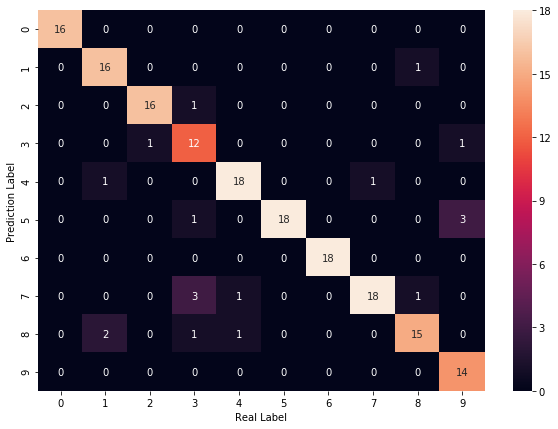

In [20]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [21]:
plt.hist(list_P)

(array([16., 17., 17., 14., 20., 22., 18., 23., 19., 14.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [22]:
plt.hist(digits.target[1617:])

(array([16., 19., 17., 18., 20., 18., 18., 19., 17., 18.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [23]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))


#0 min_error:136 index:[5] real:5
#1 min_error:160 index:[3] real:2
#2 min_error:169 index:[8] real:8
#3 min_error:52 index:[0] real:0
#4 min_error:109 index:[1] real:1
#5 min_error:113 index:[7] real:7
#6 min_error:76 index:[6] real:6
#7 min_error:110 index:[3] real:3
#8 min_error:97 index:[2] real:2
#9 min_error:119 index:[1] real:1
#10 min_error:150 index:[7] real:7
#11 min_error:166 index:[7] real:4
#12 min_error:91 index:[6] real:6
#13 min_error:111 index:[3] real:3
#14 min_error:114 index:[1] real:1
#15 min_error:146 index:[3] real:3
#16 min_error:162 index:[5] real:9
#17 min_error:110 index:[1] real:1
#18 min_error:137 index:[7] real:7
#19 min_error:60 index:[6] real:6
#20 min_error:168 index:[8] real:8
#21 min_error:79 index:[4] real:4
#22 min_error:103 index:[3] real:3
#23 min_error:130 index:[1] real:1
#24 min_error:76 index:[4] real:4
#25 min_error:76 index:[0] real:0
#26 min_error:92 index:[5] real:5
#27 min_error:93 index:[3] real:3
#28 min_error:136 index:[6] real:6
#29 m

In [24]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:8780 Total connections::8837


In [25]:
necoc = 511
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.9128014842300557
Avg Base Learner:0.7820430431557073
